## Kernel Density Estimation

In [1]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

### Part 1

In [3]:
# set up bandwidths h for kernels
h = np.array([0.1, 1, 3])

# set up training sample sizes n
n = np.linspace(1, 150, 150, dtype=int)

# set up univariate Gaussian Mixture Model with three components
means = np.array([1, 0, -2])
stds = np.array([3, 1, 5])
pi = np.array([0.1, 0.5, 0.4])

# returns true density values of GMM for points in X
def f(X, means, stds, pi):
    y = np.zeros_like(X)
    for m, s, p in zip(means, stds, pi):
        y += norm.pdf(X, loc=m, scale=s) * p
    return y
    
# plot mse as a function of training size n
def plot_mse(x, y, headline):
    plt.plot(x, y)
    plt.title(headline)
    plt.xlabel("n")
    plt.ylabel("mse")
    plt.show()


### Parzen Window Estimator

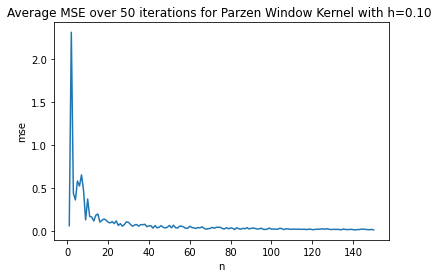

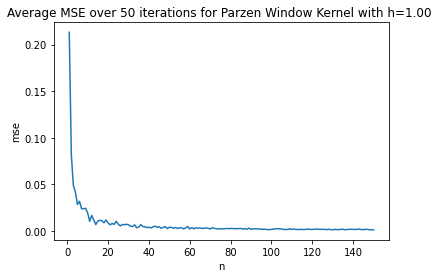

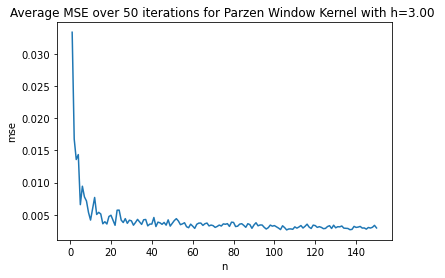

In [23]:
# parzen window function, returns 1 if absolute value is smaller than 0.5
def phi(X):
    X = np.abs(X)
    return X <= 0.5

# implementaion of parzen window estimator
class ParzenWindow:
    def __init__(self, bandwidth):
        self.h = bandwidth
    
    def estimate(self, x, X_train):
        '''parzen window estimate'''
        k = phi((X_train-x)/self.h).sum()
        return k/(X_train.shape[0]*self.h)
    

# experiment for parzen window
for bw in h:
    mse_bw = np.zeros(n.shape[0])
    for i, size in enumerate(n):
        mse_size = np.zeros(50)
        for j in range(50):
            # sample training data from univariate GMM
            X_train = np.zeros((size, 1))
            chosen_components = np.random.choice(len(pi), size=size, p=pi)  
            for k, c in enumerate(chosen_components):
                X_train[k,:] = normal(means[c], stds[c], size=1)
            
            # sample 1000 test data points
            X_test = np.zeros((1000, 1))
            chosen_componentes = np.random.choice(len(pi), size=1000, p=pi)  
            for k, c in enumerate(chosen_components):
                X_test[k,:] = normal(means[c], stds[c], size=1)
                
            # set up parzen window and estimate densities
            parzen_kde = ParzenWindow(bandwidth=bw)
            est_densities = np.zeros_like(X_test)
            for k, x in enumerate(X_test):
                est_densities[k] = parzen_kde.estimate(x, X_train)
            
            # calculate mean squared error
            real_densities = f(X_test, means, stds, pi)
            mse_size[j] = mean_squared_error(real_densities, est_densities)
        
        # mean mse of 50 iterations
        mse_bw[i] = np.mean(mse_size)
        
    # plot mse for bandwidth h as a function of training size n 
    title = "Average MSE over 50 iterations for Parzen Window Kernel with h={:.2f} ".format(bw)
    plot_mse(n, mse_bw, title)


### Gaussian Kernel Estimator

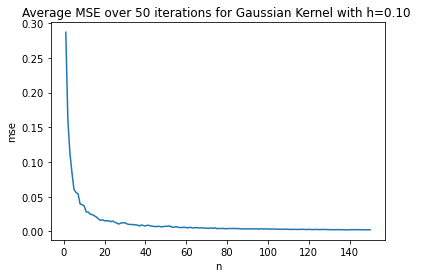

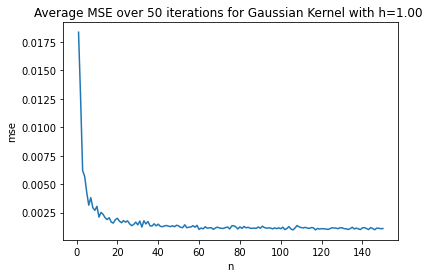

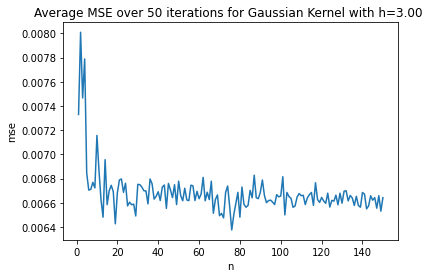

In [4]:
# experiment for gaussian kernel
for bw in h:
    mse_bw = np.zeros(n.shape[0])
    for i, size in enumerate(n):
        mse_size = np.zeros(50)
        for j in range(50):
            # sample training data from univariate GMM
            X_train = np.zeros((size,1))
            chosen_components = np.random.choice(len(pi), size=size, p=pi)  
            for k, c in enumerate(chosen_components):
                X_train[k,:] = normal(means[c], stds[c], size=1)
    
            # fit gaussian kde to training data
            gaussian_kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X_train)
            
            # sample 1000 test data points
            X_test = np.zeros((1000,1))
            chosen_components = np.random.choice(len(pi), size=1000, p=pi)  
            for k, c in enumerate(chosen_components):
                X_test[k,:] = normal(means[c], stds[c], size=1)
            
            # calculate mean squared error between test data labels and estimated labels
            est_labels = np.exp(gaussian_kde.score_samples(X_test))
            real_labels = f(X_test, means, stds, pi)
            
            mse_size[j] = mean_squared_error(real_labels, est_labels)
        
        # mean mse of 50 iterations
        mse_bw[i] = np.mean(mse_size)
         
    # plot mse for bandwidth h as a function of training size n   
    title = "Average MSE over 50 iterations for Gaussian Kernel with h={:.2f} ".format(bw)
    plot_mse(n, mse_bw, title)
